In [498]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

import time
start = time.time()

In [499]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [500]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


### conso.csv créé par pi4 node-red onglet Linky

In [501]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689662 entries, 0 to 1689661
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1689662 non-null  int64  
 1   kWh       1689662 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 25.8 MB


In [502]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1689657    0.21
1689658    0.21
1689659    0.20
1689660    0.21
1689661    0.21
Name: kWh, Length: 1689662, dtype: float64

In [503]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1689657    0.21
1689658    0.21
1689659    0.20
1689660    0.21
1689661    0.21
Name: kWh, Length: 1689662, dtype: float64

In [504]:
l=len(conso_data)-1
l

1689661

In [505]:
conso_data['sec']=conso_data['Interval']/1000


In [506]:
conso_data['Wh']=3600000/conso_data['Interval']


In [507]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [508]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689662 entries, 0 to 1689661
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1689662 non-null  int64  
 1   kWh        1689662 non-null  float64
 2   sec        1689662 non-null  float64
 3   Wh         1689662 non-null  float64
 4   cumul(ms)  1689662 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 64.5 MB


In [509]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1689657,17093,0.21,17.093,210.612531,41694083635
1689658,17121,0.21,17.121,210.268092,41694100756
1689659,17577,0.20,17.577,204.813108,41694118333
1689660,17257,0.21,17.257,208.610998,41694135590
1689661,16870,0.21,16.870,213.396562,41694152460


In [510]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

41694152460000

In [511]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 19, 47, 40, 415832)

In [512]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [513]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [514]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]



In [515]:
conso_data['dates']

0         2023-08-21 19:48:02.349832
1         2023-08-21 19:48:24.207832
2         2023-08-21 19:48:46.208832
3         2023-08-21 19:49:08.136832
4         2023-08-21 19:49:30.027832
                     ...            
1689657   2024-12-16 09:29:04.050832
1689658   2024-12-16 09:29:21.171832
1689659   2024-12-16 09:29:38.748832
1689660   2024-12-16 09:29:56.005832
1689661   2024-12-16 09:30:12.875832
Name: dates, Length: 1689662, dtype: datetime64[ns]

## créer les dates

In [516]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:48:02.349832,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:48:24.207832,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:48:46.208832,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:49:08.136832,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:49:30.027832,21/08/23
...,...,...,...,...,...,...,...
1689657,17093,0.21,17.093,210.612531,41694083635,2024-12-16 09:29:04.050832,16/12/24
1689658,17121,0.21,17.121,210.268092,41694100756,2024-12-16 09:29:21.171832,16/12/24
1689659,17577,0.20,17.577,204.813108,41694118333,2024-12-16 09:29:38.748832,16/12/24
1689660,17257,0.21,17.257,208.610998,41694135590,2024-12-16 09:29:56.005832,16/12/24


### save conso_data with dates

In [517]:
#to_csv(r'../conso_data_with_dates.csv',conso_data)

# tranche journalière


In [518]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('16/12/24', 16, 12, 2024)

In [519]:
here = now.strftime('%H:%M:%S')
here

'09:30:48'

In [520]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [521]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1332 entries, 1688330 to 1689661
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1332 non-null   int64         
 1   kWh        1332 non-null   float64       
 2   sec        1332 non-null   float64       
 3   Wh         1332 non-null   float64       
 4   cumul(ms)  1332 non-null   int64         
 5   dates      1332 non-null   datetime64[ns]
 6   days       1332 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 83.2+ KB


In [522]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [523]:
data = list(df_grp['kWh'])
print(data)

[0.739, 3.7, 4.234, 3.688, 4.135, 4.576, 3.583, 3.428, 3.524, 3.692, 3.669, 3.89, 4.256, 3.716, 3.554, 3.64, 3.322, 3.374, 4.24, 4.013, 4.038, 3.955, 3.464, 4.398, 3.804, 3.757, 4.228, 4.728, 3.898, 3.223, 3.177, 3.96, 3.713, 3.131, 3.771, 4.157, 3.749, 3.604, 4.72, 4.235, 4.495, 3.805, 3.435, 4.298, 3.872, 3.827, 3.471, 4.074, 3.666, 3.399, 4.169, 3.365, 3.869, 3.844, 3.636, 3.75, 4.262, 3.294, 3.882, 3.022, 2.055, 2.048, 2.406, 4.084, 3.699, 4.332, 3.606, 3.94, 3.757, 3.845, 4.062, 4.085, 3.676, 3.147, 3.799, 3.524, 3.618, 3.66, 3.683, 3.297, 3.847, 3.26, 3.753, 3.65, 4.073, 3.564, 3.408, 3.745, 4.115, 4.335, 3.936, 4.19, 4.241, 3.76, 3.917, 3.845, 3.92, 3.716, 4.072, 4.348, 3.89, 3.499, 3.682, 3.675, 3.345, 3.845, 3.996, 4.102, 3.497, 4.161, 3.596, 4.004, 4.606, 3.648, 3.484, 3.567, 4.099, 3.752, 4.083, 3.997, 3.745, 3.593, 5.114, 3.717, 3.763, 4.244, 4.135, 4.621, 4.443, 4.038, 3.706, 4.337, 4.734, 4.167, 4.806, 4.337, 3.691, 4.199, 3.713, 3.696, 3.531, 3.908, 3.696, 3.775, 3.589, 

In [524]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [525]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [526]:
df = conso_data
len(df)

1689662

In [527]:
period(p=2)

2023-08-22 01:54:16.152832	2023-08-22 08:58:31.772832	7h 4m 15s 	2000


In [528]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.294527
dtype: float64

In [529]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.491037
dtype: float64

In [530]:
last=df_grp.iloc[-1]['kWh']
last

1.332

In [531]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1332 entries, 1688330 to 1689661
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1332 non-null   int64         
 1   kWh        1332 non-null   float64       
 2   sec        1332 non-null   float64       
 3   Wh         1332 non-null   float64       
 4   cumul(ms)  1332 non-null   int64         
 5   dates      1332 non-null   datetime64[ns]
 6   days       1332 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 83.2+ KB


In [532]:
# select day
day = today
#day = '16/08/24'


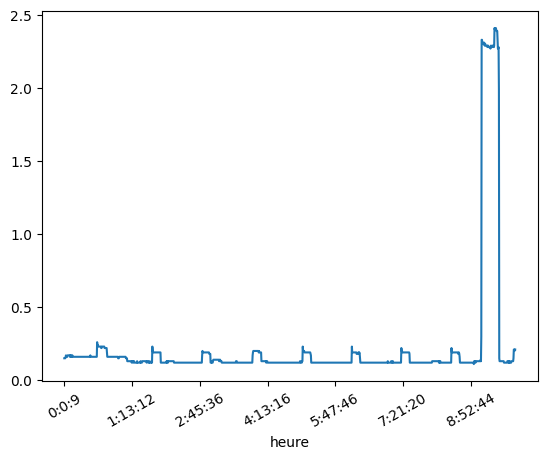

In [533]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [534]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:48:02.349832,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:48:24.207832,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:48:46.208832,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:49:08.136832,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:49:30.027832,21/08/23
...,...,...,...,...,...,...,...
1689657,17093,0.21,17.093,210.612531,41694083635,2024-12-16 09:29:04.050832,16/12/24
1689658,17121,0.21,17.121,210.268092,41694100756,2024-12-16 09:29:21.171832,16/12/24
1689659,17577,0.20,17.577,204.813108,41694118333,2024-12-16 09:29:38.748832,16/12/24
1689660,17257,0.21,17.257,208.610998,41694135590,2024-12-16 09:29:56.005832,16/12/24


In [535]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:9,23714,0.15,23.714,151.809058,41659948654,2024-12-16 00:00:09.069832,16/12/24
0:0:32,23228,0.15,23.228,154.985362,41659971882,2024-12-16 00:00:32.297832,16/12/24
0:0:55,23508,0.15,23.508,153.139357,41659995390,2024-12-16 00:00:55.805832,16/12/24
0:1:19,23548,0.15,23.548,152.879225,41660018938,2024-12-16 00:01:19.353832,16/12/24
0:1:42,22912,0.16,22.912,157.122905,41660041850,2024-12-16 00:01:42.265832,16/12/24
...,...,...,...,...,...,...,...
9:29:4,17093,0.21,17.093,210.612531,41694083635,2024-12-16 09:29:04.050832,16/12/24
9:29:21,17121,0.21,17.121,210.268092,41694100756,2024-12-16 09:29:21.171832,16/12/24
9:29:38,17577,0.20,17.577,204.813108,41694118333,2024-12-16 09:29:38.748832,16/12/24


In [536]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 19/11/24 4.547
Min : 03/12/24 3.121


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1688330,23714,0.15,23.714,151.809058,41659948654,2024-12-16 00:00:09.069832,16/12/24,0:0:9
1688331,23228,0.15,23.228,154.985362,41659971882,2024-12-16 00:00:32.297832,16/12/24,0:0:32
1688332,23508,0.15,23.508,153.139357,41659995390,2024-12-16 00:00:55.805832,16/12/24,0:0:55
1688333,23548,0.15,23.548,152.879225,41660018938,2024-12-16 00:01:19.353832,16/12/24,0:1:19
1688334,22912,0.16,22.912,157.122905,41660041850,2024-12-16 00:01:42.265832,16/12/24,0:1:42
...,...,...,...,...,...,...,...,...
1689657,17093,0.21,17.093,210.612531,41694083635,2024-12-16 09:29:04.050832,16/12/24,9:29:4
1689658,17121,0.21,17.121,210.268092,41694100756,2024-12-16 09:29:21.171832,16/12/24,9:29:21
1689659,17577,0.20,17.577,204.813108,41694118333,2024-12-16 09:29:38.748832,16/12/24,9:29:38
1689660,17257,0.21,17.257,208.610998,41694135590,2024-12-16 09:29:56.005832,16/12/24,9:29:56


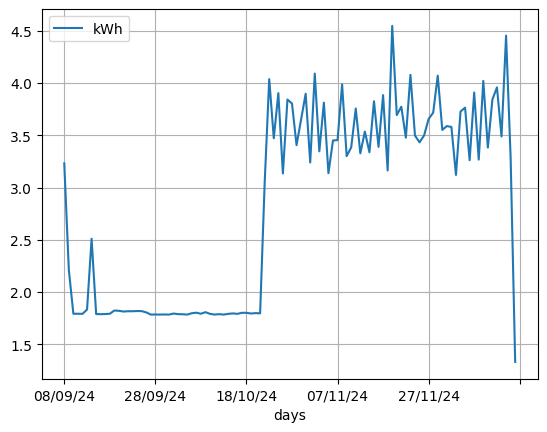

In [537]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2024-12-16 00:00:09.069832	2024-12-16 07:21:01.777832	7h 20m 52s 	1000
2024-12-16 07:21:01.777832	2024-12-16 09:30:12.875832	2h 9m 11s 	332
<class 'pandas.core.frame.DataFrame'>
Index: 1332 entries, 1688330 to 1689661
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1332 non-null   int64         
 1   kWh        1332 non-null   float64       
 2   sec        1332 non-null   float64       
 3   Wh         1332 non-null   float64       
 4   cumul(ms)  1332 non-null   int64         
 5   dates      1332 non-null   datetime64[ns]
 6   days       1332 non-null   object        
 7   heure      1332 non-null   object        
 8   hours      1332 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 104.1+ KB


('16/12/24', <Axes: xlabel='hours'>)

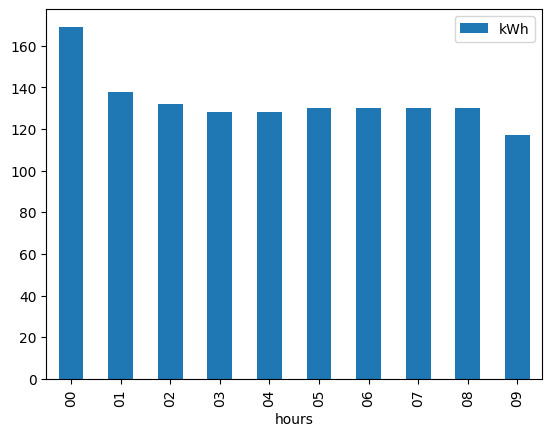

In [538]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [539]:
df_grp

,kWh
days,
21/08/23,0.739
22/08/23,3.700
23/08/23,4.234
24/08/23,3.688
25/08/23,4.135
...,...
12/12/24,3.959
13/12/24,3.489
14/12/24,4.454


In [540]:
# select number of days to display
span = 30
#df_grp.tail(span)


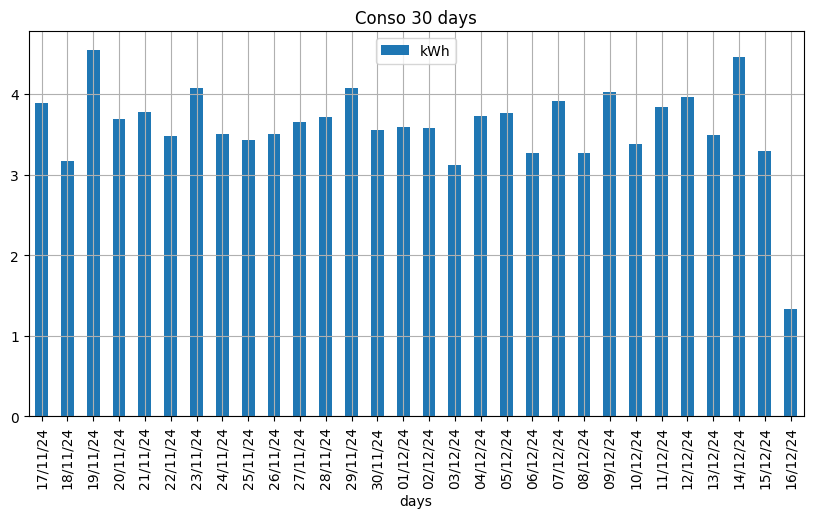

In [541]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


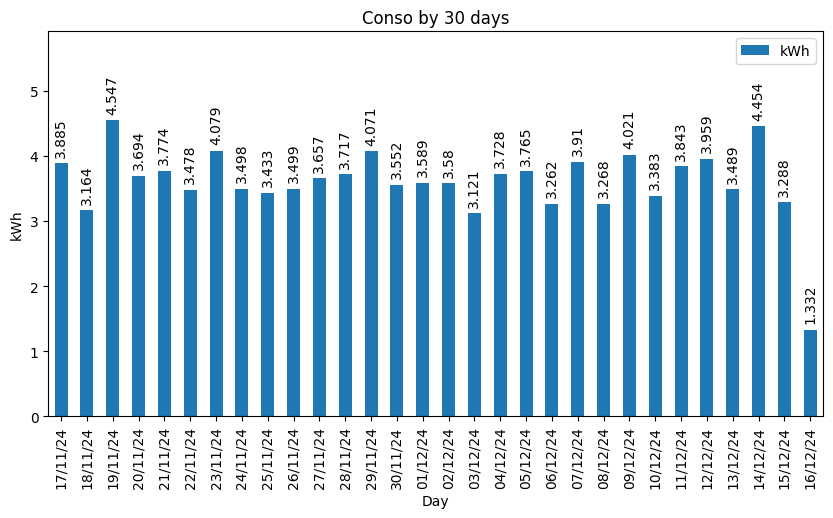

In [542]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [543]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
17/11/24    3.885
18/11/24    3.164
19/11/24    4.547
20/11/24    3.694
21/11/24    3.774
22/11/24    3.478
23/11/24    4.079
24/11/24    3.498
25/11/24    3.433
26/11/24    3.499
27/11/24    3.657
28/11/24    3.717
29/11/24    4.071
30/11/24    3.552
01/12/24    3.589
02/12/24    3.580
03/12/24    3.121
04/12/24    3.728
05/12/24    3.765
06/12/24    3.262
07/12/24    3.910
08/12/24    3.268
09/12/24    4.021
10/12/24    3.383
11/12/24    3.843
12/12/24    3.959
13/12/24    3.489
14/12/24    4.454
15/12/24    3.288
16/12/24    1.332
Name: kWh, dtype: float64

In [544]:
x_labels=df_grp.tail(span).index
x_labels

Index(['17/11/24', '18/11/24', '19/11/24', '20/11/24', '21/11/24', '22/11/24',
       '23/11/24', '24/11/24', '25/11/24', '26/11/24', '27/11/24', '28/11/24',
       '29/11/24', '30/11/24', '01/12/24', '02/12/24', '03/12/24', '04/12/24',
       '05/12/24', '06/12/24', '07/12/24', '08/12/24', '09/12/24', '10/12/24',
       '11/12/24', '12/12/24', '13/12/24', '14/12/24', '15/12/24', '16/12/24'],
      dtype='object', name='days')

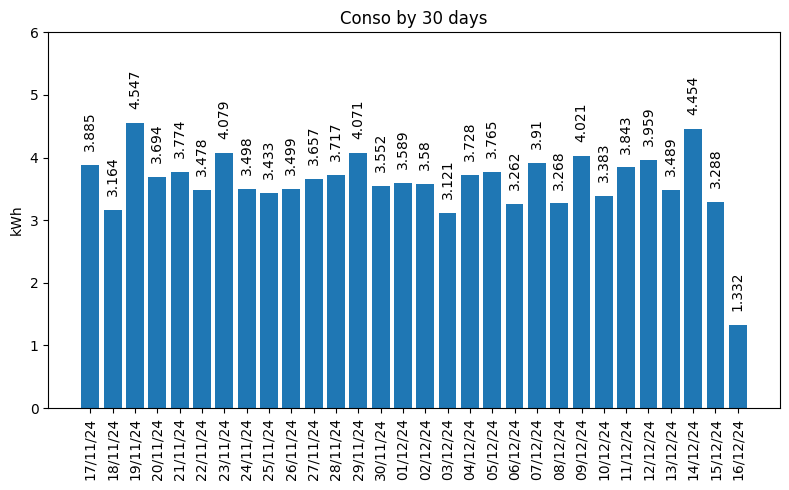

In [545]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [546]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

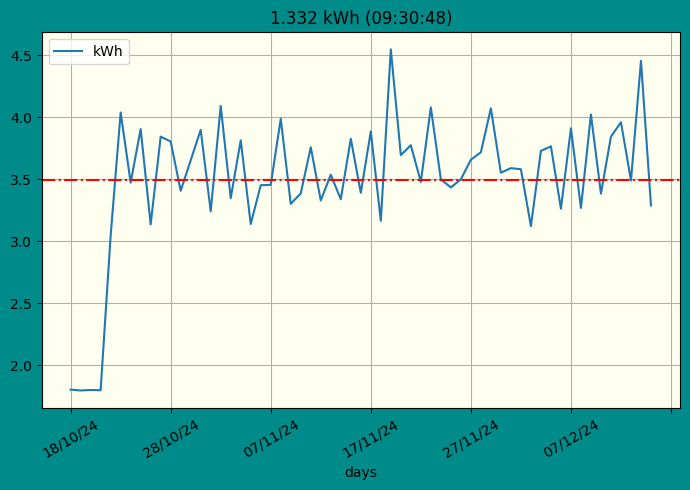

In [547]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

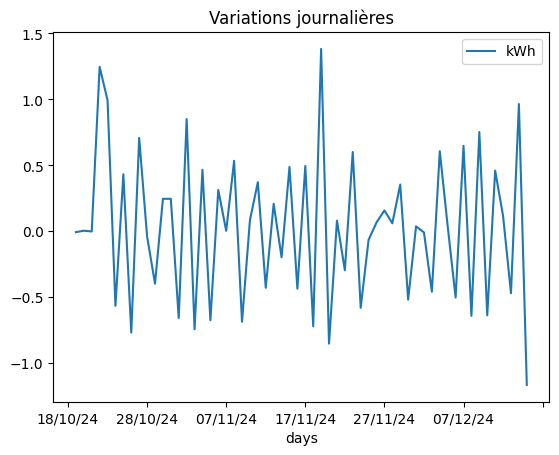

In [548]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [549]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:48:02.349832,21/08/23,19
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:48:24.207832,21/08/23,19
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:48:46.208832,21/08/23,19
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:49:08.136832,21/08/23,19
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:49:30.027832,21/08/23,19
...,...,...,...,...,...,...,...,...
1689657,17093,0.21,17.093,210.612531,41694083635,2024-12-16 09:29:04.050832,16/12/24,09
1689658,17121,0.21,17.121,210.268092,41694100756,2024-12-16 09:29:21.171832,16/12/24,09
1689659,17577,0.20,17.577,204.813108,41694118333,2024-12-16 09:29:38.748832,16/12/24,09
1689660,17257,0.21,17.257,208.610998,41694135590,2024-12-16 09:29:56.005832,16/12/24,09


In [550]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [551]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [552]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [553]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [554]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,739
22/08/23,3700
23/08/23,4234
24/08/23,3688
25/08/23,4135
...,...
12/12/24,3959
13/12/24,3489
14/12/24,4454


In [555]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:48:02.349832,21/08/23,19
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:48:24.207832,21/08/23,19
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:48:46.208832,21/08/23,19
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:49:08.136832,21/08/23,19
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:49:30.027832,21/08/23,19
...,...,...,...,...,...,...,...,...
1689657,17093,0.21,17.093,210.612531,41694083635,2024-12-16 09:29:04.050832,16/12/24,09
1689658,17121,0.21,17.121,210.268092,41694100756,2024-12-16 09:29:21.171832,16/12/24,09
1689659,17577,0.20,17.577,204.813108,41694118333,2024-12-16 09:29:38.748832,16/12/24,09
1689660,17257,0.21,17.257,208.610998,41694135590,2024-12-16 09:29:56.005832,16/12/24,09


In [556]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 19    0        21/08/23    19  0.16
               1        21/08/23    19  0.16
               2        21/08/23    19  0.16
               3        21/08/23    19  0.16
               4        21/08/23    19  0.16
...                          ...   ...   ...
16/12/24 09    1689657  16/12/24    09  0.21
               1689658  16/12/24    09  0.21
               1689659  16/12/24    09  0.20
               1689660  16/12/24    09  0.21
               1689661  16/12/24    09  0.21

[1689662 rows x 3 columns]

In [557]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [558]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '19'), ('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '19'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('22/08/23', '18'), ('23/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/23', '13'), ('23/08/23', '14'), ('23/08/2

In [559]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,739,739
22/08/23,3700,3700
23/08/23,4234,4234
24/08/23,3688,3688
25/08/23,4135,4135
...,...,...
12/12/24,3959,3959
13/12/24,3489,3489
14/12/24,4454,4454


In [560]:
grp_by_day['kWh'].cumsum()

days
21/08/23        739
22/08/23       4439
23/08/23       8673
24/08/23      12361
25/08/23      16496
             ...   
12/12/24    1677099
13/12/24    1680588
14/12/24    1685042
15/12/24    1688330
16/12/24    1689662
Name: kWh, Length: 484, dtype: int64

In [561]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 19      33
         20     273
         21     173
         22     130
         23     130
...             ...
16/12/24 05     130
         06     130
         07     130
         08     130
         09     117

[11583 rows x 1 columns]

In [562]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  19            33
          20           306
          21           479
          22           609
          23           739
                    ...   
16/12/24  05       1689155
          06       1689285
          07       1689415
          08       1689545
          09       1689662
Name: kWh, Length: 11583, dtype: int64

In [563]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 19      33      33    NaN
         20     273     306  240.0
         21     173     479 -100.0
         22     130     609  -43.0
         23     130     739    0.0
...             ...     ...    ...
16/12/24 05     130     825    2.0
         06     130     955    0.0
         07     130    1085    0.0
         08     130    1215    0.0
         09     117    1332  -13.0

[11583 rows x 3 columns]

In [564]:
today, grp_by_dayhours.loc[today]

('16/12/24',
        kWh  cumsum  diff
 hours                   
 00     169     169   NaN
 01     138     307 -31.0
 02     132     439  -6.0
 03     128     567  -4.0
 04     128     695   0.0
 05     130     825   2.0
 06     130     955   0.0
 07     130    1085   0.0
 08     130    1215   0.0
 09     117    1332 -13.0)

Text(0.5, 1.0, 'Cumul journalier')

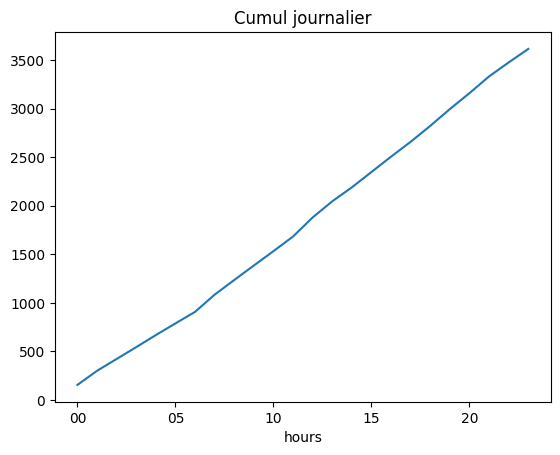

In [565]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

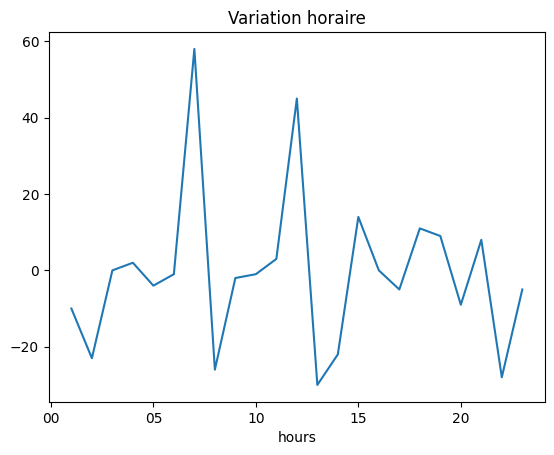

In [566]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [567]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

484

In [568]:
df_grp.tail(n)['kWh'].describe()


count    484.000000
mean       3.491037
std        0.696910
min        0.739000
25%        3.338000
50%        3.622000
75%        3.878250
max        5.114000
Name: kWh, dtype: float64

In [569]:
maxday = df_grp.tail(n)['kWh'].idxmax()

Text(0.5, 1.0, '484 days')

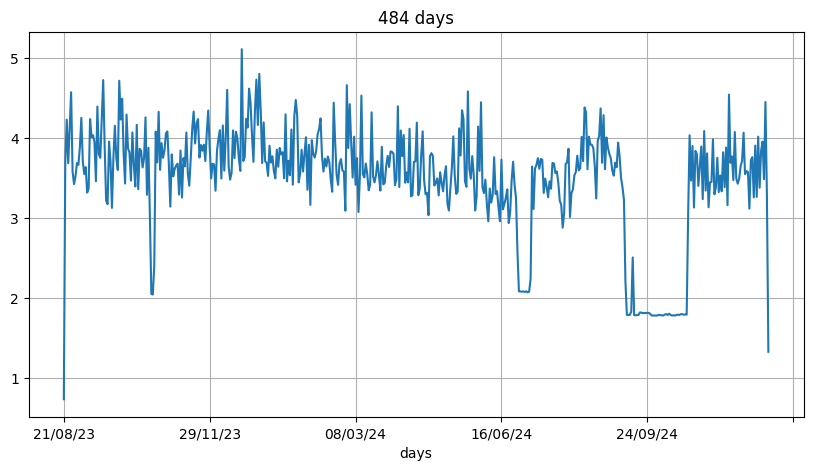

In [570]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '100 days')

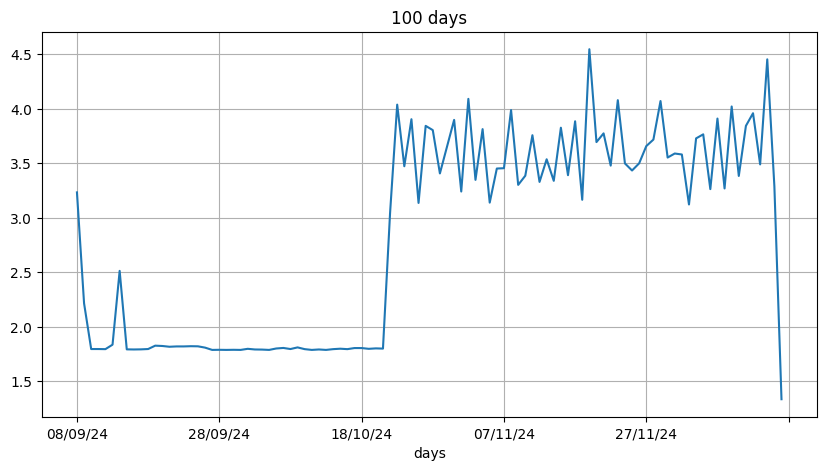

In [571]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [572]:
df_grp['kWh']

days
21/08/23    0.739
22/08/23    3.700
23/08/23    4.234
24/08/23    3.688
25/08/23    4.135
            ...  
12/12/24    3.959
13/12/24    3.489
14/12/24    4.454
15/12/24    3.288
16/12/24    1.332
Name: kWh, Length: 484, dtype: float64

In [573]:
df_grp.describe()

,kWh
count,484.000000
mean,3.491037
std,0.696910
min,0.739000
25%,3.338000
50%,3.622000
75%,3.878250
max,5.114000


array([[<Axes: title={'center': 'kWh'}>]], dtype=object)

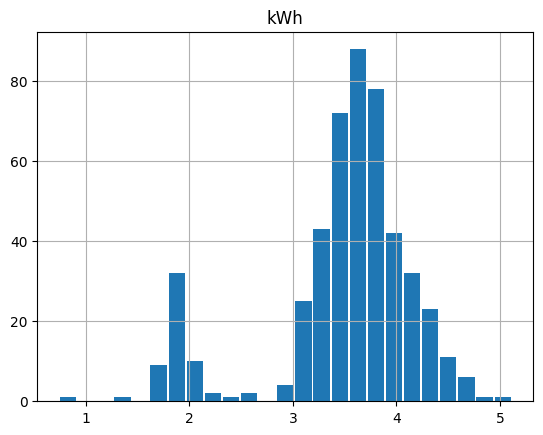

In [574]:
# répartition des consos de 1 à 5 kWh par jour
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# histtype{'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
df_grp.hist(bins=25, density=False, histtype='bar',rwidth=0.9, align='mid')

In [575]:
df_grp.tail(span)['kWh']

days
08/09/24    3.232
09/09/24    2.213
10/09/24    1.793
11/09/24    1.793
12/09/24    1.792
            ...  
12/12/24    3.959
13/12/24    3.489
14/12/24    4.454
15/12/24    3.288
16/12/24    1.332
Name: kWh, Length: 100, dtype: float64

# Conso par heure

In [576]:
day

'16/12/24'

In [577]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,169,169,NaN
01,138,307,-31.0
02,132,439,-6.0
03,128,567,-4.0
04,128,695,0.0
05,130,825,2.0
06,130,955,0.0
07,130,1085,0.0
08,130,1215,0.0


In [578]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


10

In [579]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 11)

In [580]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [581]:
grp_by_dayhours.loc[day,'days'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [582]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
Name: days, dtype: float64

In [583]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [584]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 00 to 09
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     10 non-null     int64  
 1   cumsum  10 non-null     int64  
 2   diff    9 non-null      float64
 3   days    10 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 400.0+ bytes


In [585]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
Name: days, dtype: float64

In [586]:
day

'16/12/24'

In [587]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,169,169,NaN,1.0
01,138,307,-31.0,2.0
02,132,439,-6.0,3.0
03,128,567,-4.0,4.0
04,128,695,0.0,5.0
05,130,825,2.0,6.0
06,130,955,0.0,7.0
07,130,1085,0.0,8.0
08,130,1215,0.0,9.0


Text(0.5, 1.0, '16/12/24')

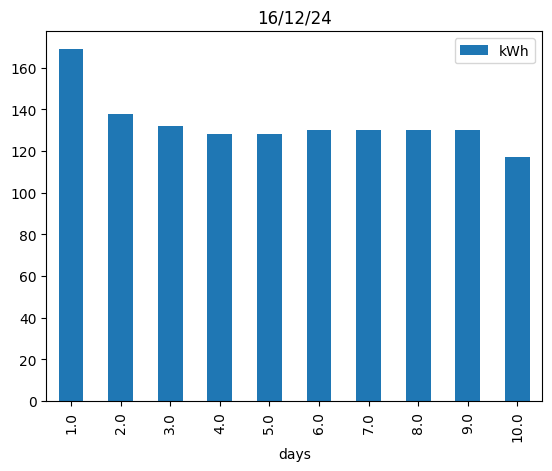

In [588]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [589]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09'], dtype='object', name='hours')

# Conso du jour


In [590]:
groupedbyhour.count()

,kWh
hours,
00,169
01,138
02,132
03,128
04,128
05,130
06,130
07,130
08,130


In [591]:
day = '09/09/24'
day = maxday
#day = today
grp_by_dayhours.loc[day].kWh

hours
00    148
01    169
02    167
03    152
04    167
05    141
06    131
07    130
08    115
09    130
10    121
11    124
12    130
13    177
14    157
15    154
16    784
17    343
18    262
19    311
20    288
21    314
22    308
23    191
Name: kWh, dtype: int64

In [592]:
def conso_by_hour(day):
    global data
    # conso by hour
    #data = groupedbyhour.count().kWh
    data = grp_by_dayhours.loc[day].kWh

    # len(groupedbyhour)
    x = np.arange(1,len(data)+1)
    ymax = max(data)+5
    #groupedbyhour.count().plot(grid=True,xticks=x)
    fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

    plt.bar(x,data)
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) {day} - Total {sum(data)}')
    plt.xlim(0,len(x)+1)
    #plt.xticks(rotation=30);
    #plt.ylim(0,ymax)

    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in data]
    fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
            fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
        )


# 100 days

282.296

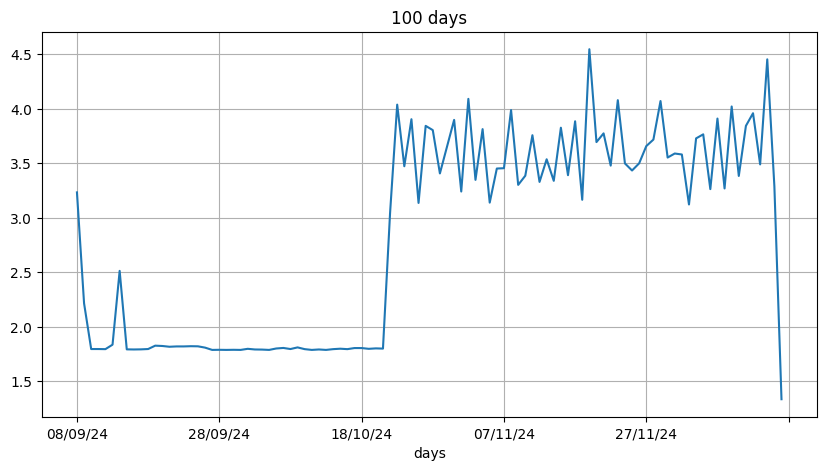

In [593]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')
sum(df_grp.tail(span)['kWh'])

In [594]:
df_grp.tail(1)

,kWh
days,
16/12/24,1.332


In [595]:
span = 1
#df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
#plt.title(f'{span} days')
sum(df_grp.tail(span)['kWh'])

1.332

In [596]:
#import timeit
#start = timeit.timeit()
#print("hello")
end = time.time()
print(end - start)

88.60070395469666


# Today

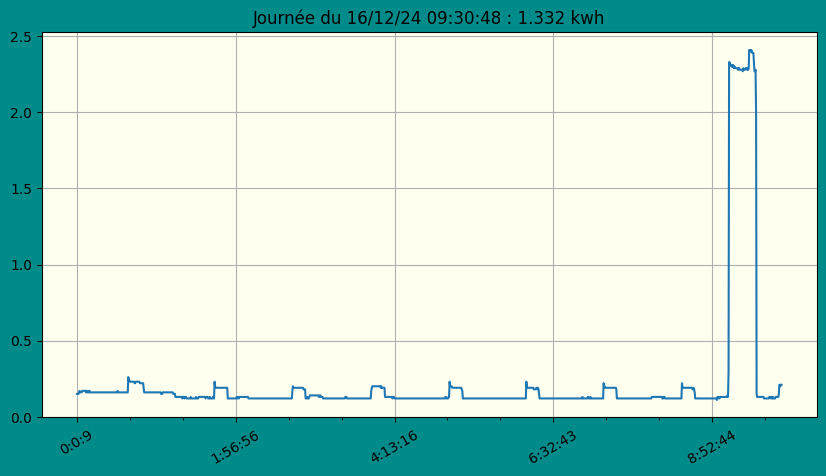

In [597]:
show(today,bgcolor='ivory')

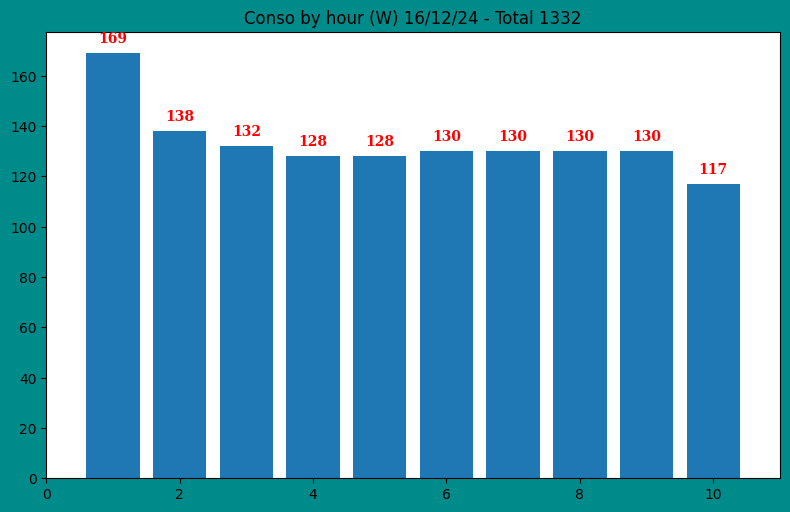

In [598]:
conso_by_hour(today)

In [599]:
day = '21/11/24'

('21/11/24', None)

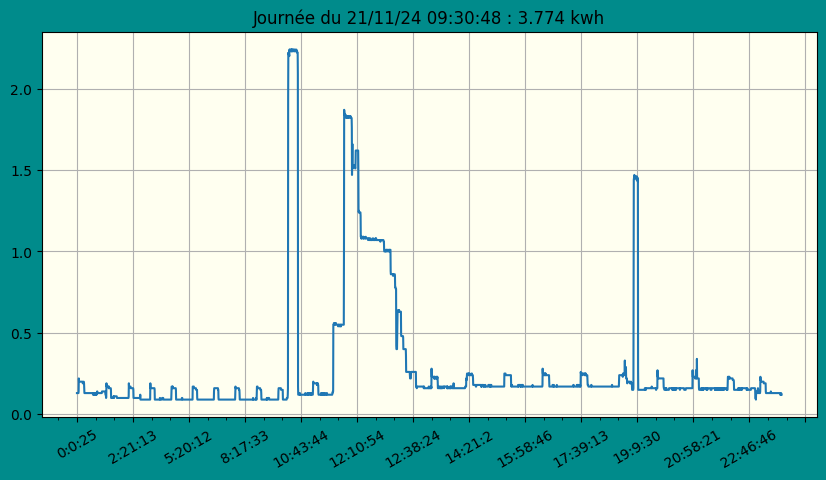

In [600]:
day, show(day,bgcolor='ivory')

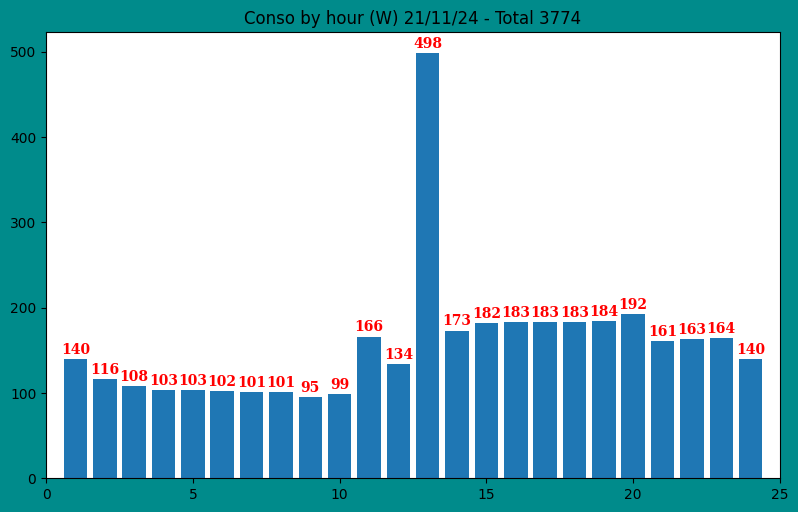

In [601]:
conso_by_hour(day)

('21/12/23', None)

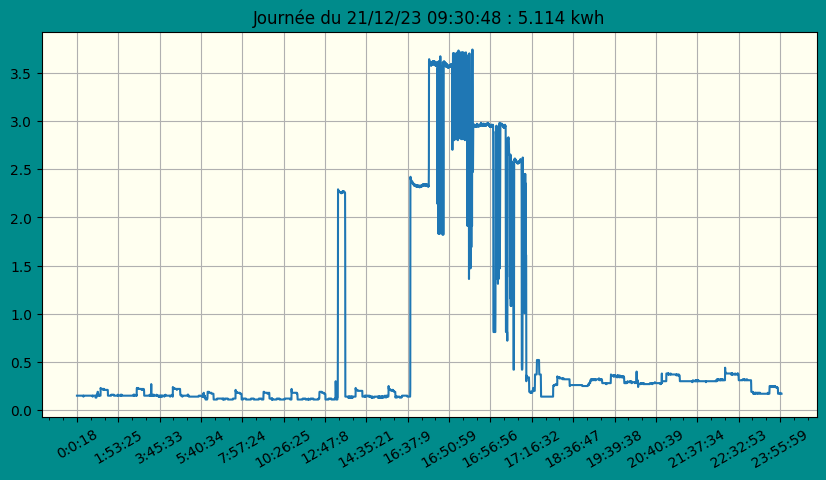

In [602]:
# retour vietnam 22/10/2024
#day = '22/10/24'
day = maxday
day, show(day,bgcolor='ivory')

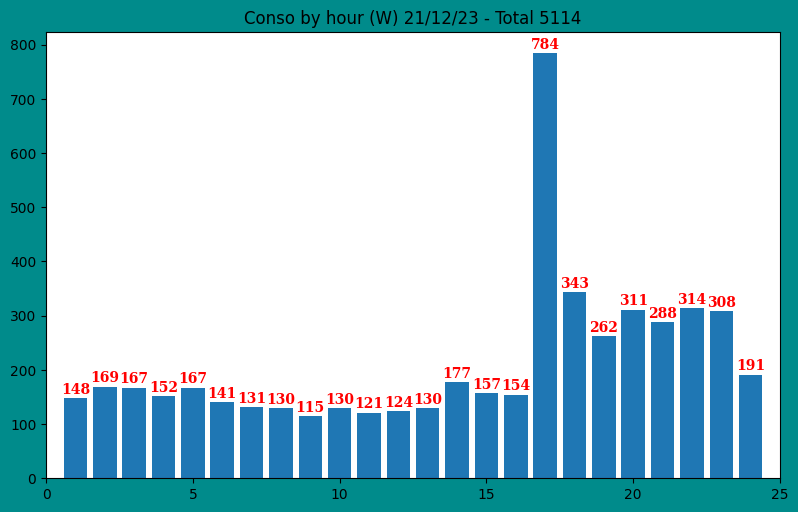

In [603]:
conso_by_hour(day)

In [604]:
sum(data)

5114

In [605]:
diff = grp_by_dayhours.loc[today]
diff


,kWh,cumsum,diff,days
hours,,,,
00,169,169,NaN,1.0
01,138,307,-31.0,2.0
02,132,439,-6.0,3.0
03,128,567,-4.0,4.0
04,128,695,0.0,5.0
05,130,825,2.0,6.0
06,130,955,0.0,7.0
07,130,1085,0.0,8.0
08,130,1215,0.0,9.0


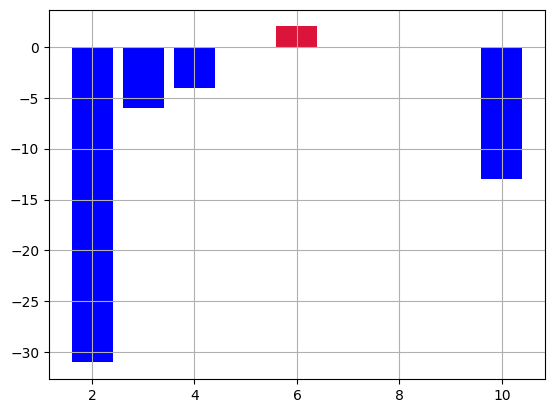

In [606]:
x = np.arange(1,len(diff)+1)

plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

In [607]:
data

hours
00    148
01    169
02    167
03    152
04    167
05    141
06    131
07    130
08    115
09    130
10    121
11    124
12    130
13    177
14    157
15    154
16    784
17    343
18    262
19    311
20    288
21    314
22    308
23    191
Name: kWh, dtype: int64

<Axes: xlabel='hours'>

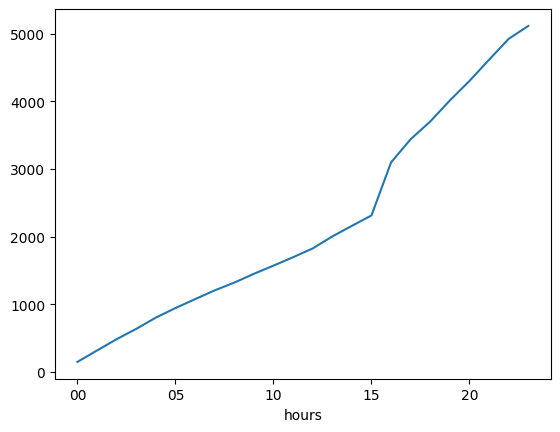

In [608]:
data.cumsum().plot()


<Axes: xlabel='hours'>

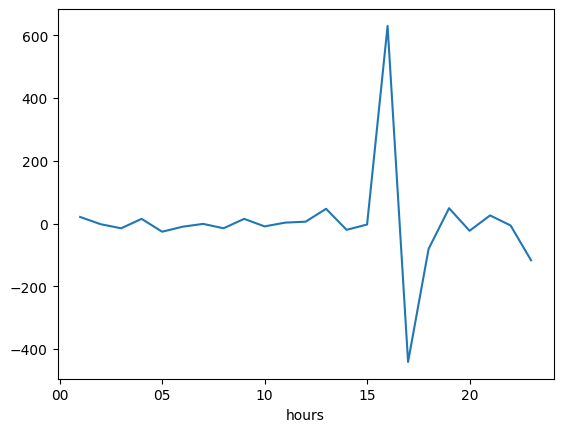

In [609]:
# evolution par heure
data.diff().plot()

In [610]:
data.diff().describe()

count     23.000000
mean       1.869565
std      167.882346
min     -441.000000
25%      -17.500000
50%       -3.000000
75%       15.000000
max      630.000000
Name: kWh, dtype: float64

<Axes: >

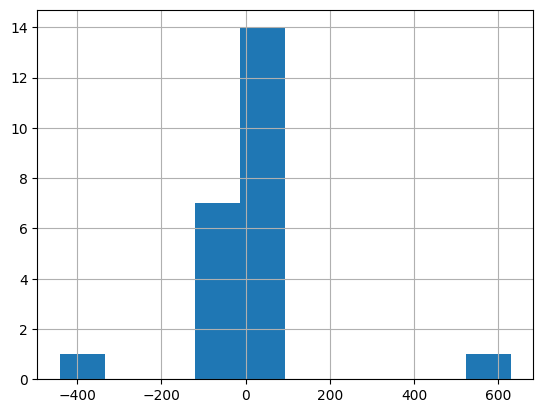

In [611]:
data.diff().hist()

# Test sauvegarde

In [612]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipy

In [613]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [614]:
#conso_byhour(day)

In [615]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

# plot any day


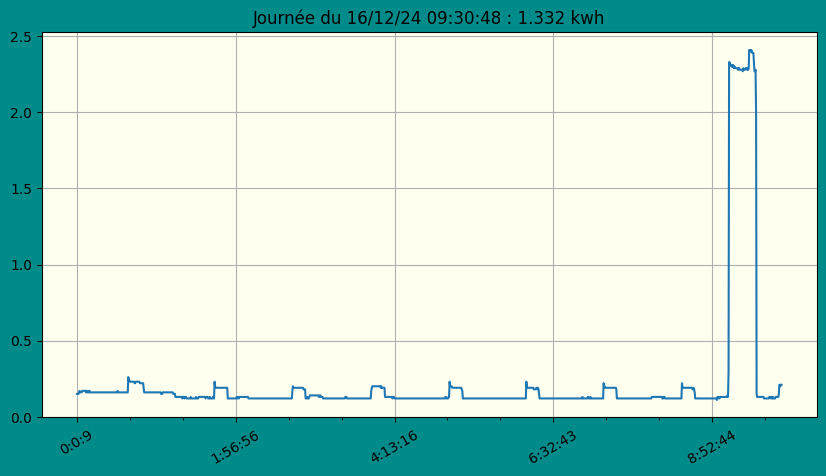

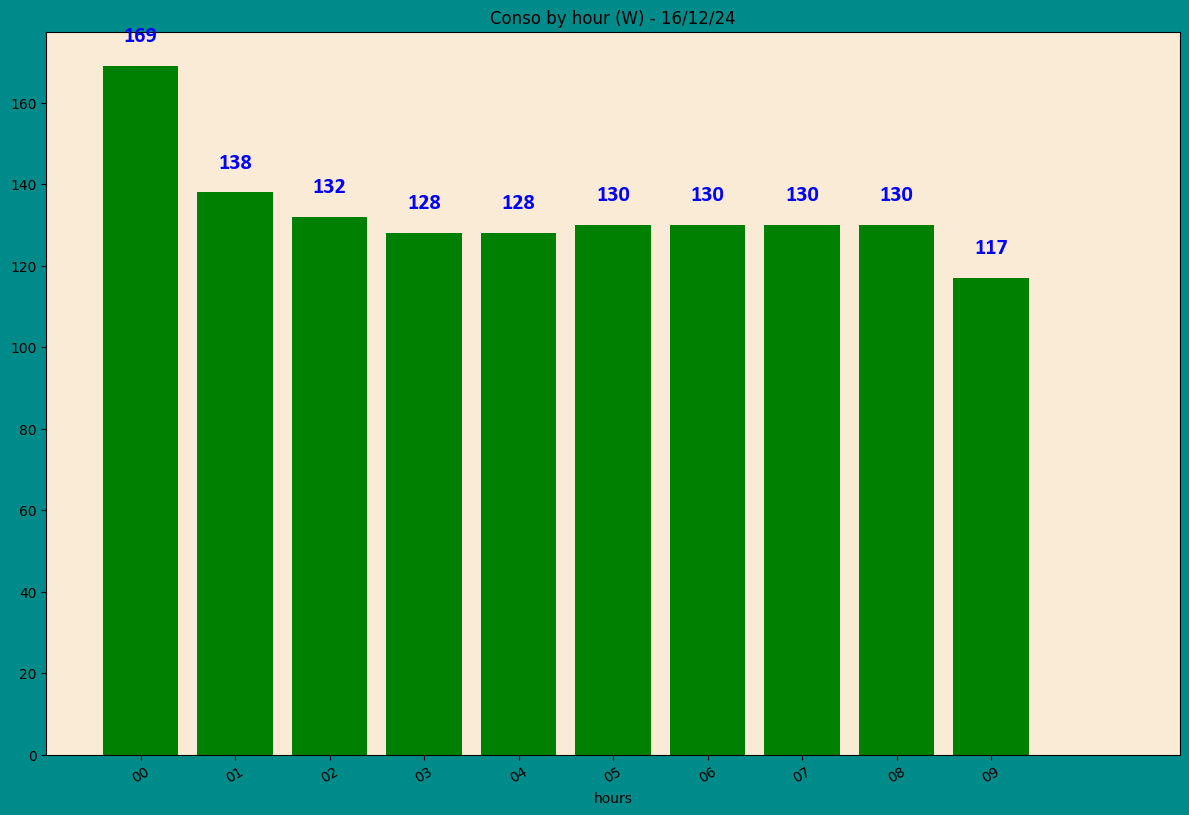

In [616]:
day = '27/10/24'
day = today
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [617]:
month.describe()


count    30.000000
mean      3.669933
std       0.346604
min       3.121000
25%       3.444250
50%       3.623000
75%       3.874500
max       4.547000
Name: kWh, dtype: float64

<Axes: >

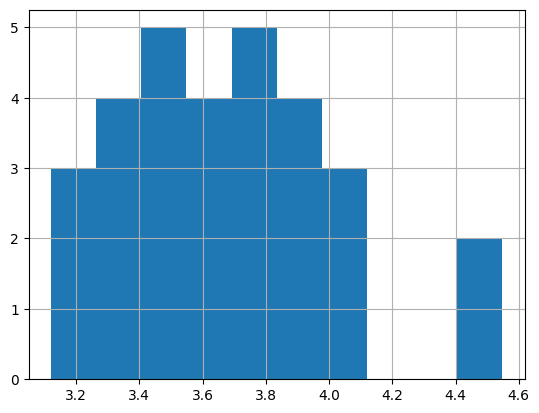

In [618]:
month.hist()

<Axes: xlabel='days'>

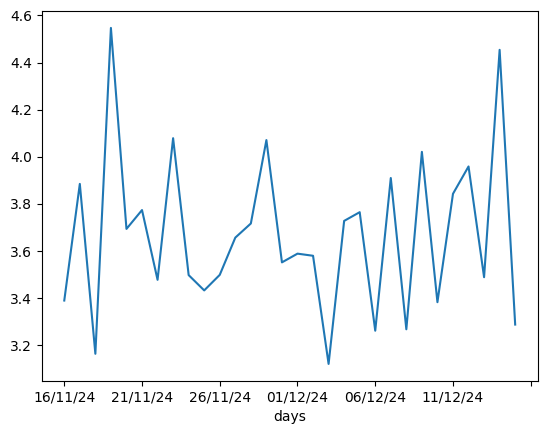

In [619]:
month.plot()

In [620]:
# date with max conso in 1 month
month.idxmax()

'19/11/24'

In [621]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'19/11/24'

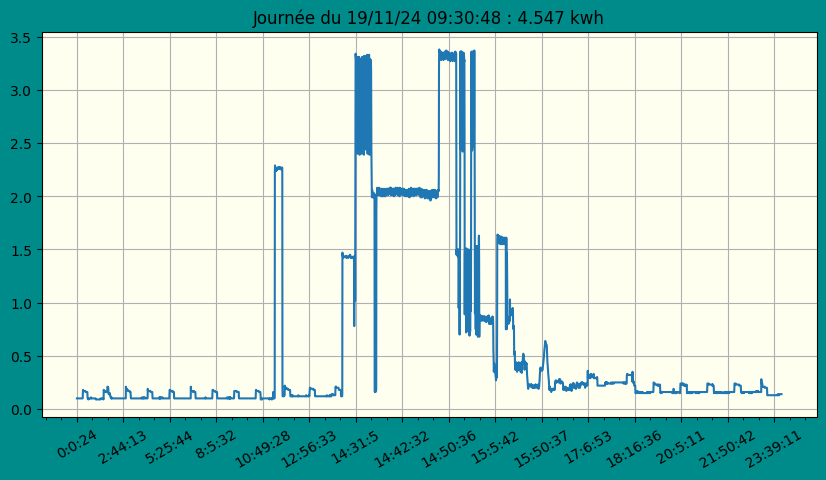

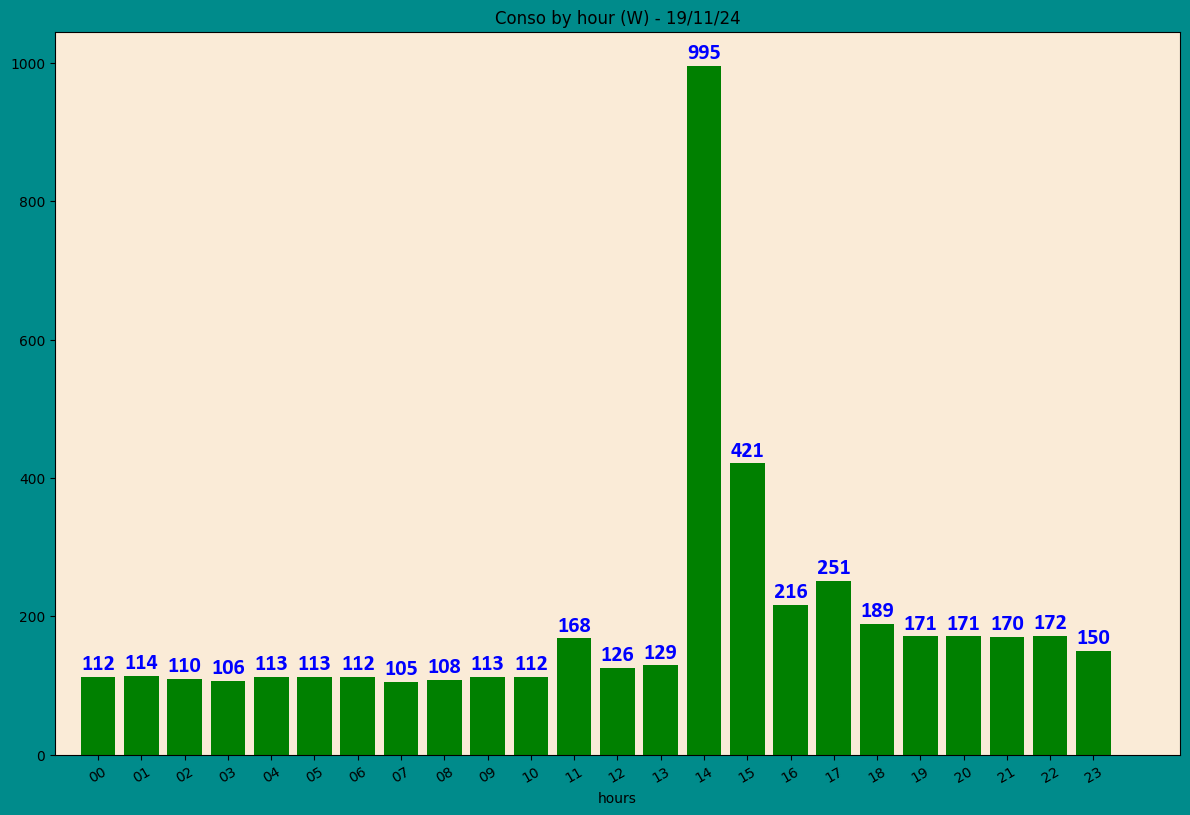

In [622]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [623]:
grp_by_dayhours

kWh  cumsum   diff  days
days     hours                          
21/08/23 19      33      33    NaN   NaN
         20     273     306  240.0   NaN
         21     173     479 -100.0   NaN
         22     130     609  -43.0   NaN
         23     130     739    0.0   NaN
...             ...     ...    ...   ...
16/12/24 05     130     825    2.0   6.0
         06     130     955    0.0   7.0
         07     130    1085    0.0   8.0
         08     130    1215    0.0   9.0
         09     117    1332  -13.0  10.0

[11583 rows x 4 columns]

In [624]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,112,112,NaN,NaN
01,114,226,2.0,NaN
02,110,336,-4.0,NaN
03,106,442,-4.0,NaN
04,113,555,7.0,NaN
05,113,668,0.0,NaN
06,112,780,-1.0,NaN
07,105,885,-7.0,NaN
08,108,993,3.0,NaN


In [625]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

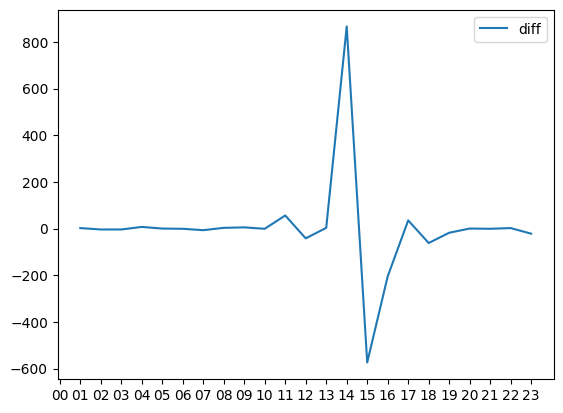

In [626]:
# diff
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

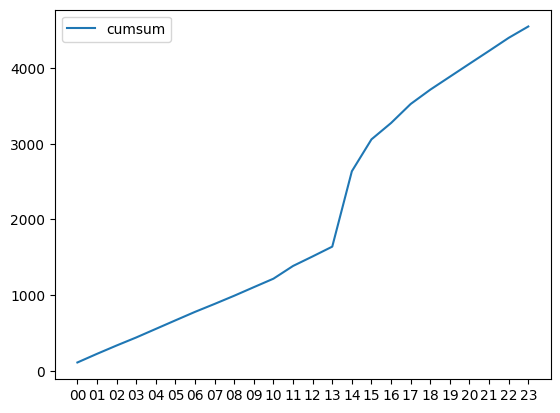

In [627]:
# cumsum
plt.plot(grp_by_dayhours.loc[month.idxmax()]['cumsum'],label=grp_by_dayhours.columns[1])
plt.legend()

In [628]:
# 41 s
# file to big to git sync

# create .gitignore
filename=r'../conso_data.csv'
#conso_data.to_csv(filename)
#43.6s size 140128 kB